In [1]:
import daal4py as d4p
import nltk
import string
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import scipy.stats as ss
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.manifold import TSNE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import scipy
import numpy as np, scipy.stats as st
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from scipy import interp
from collections import Counter
# import warnings filter
from warnings import simplefilter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.metrics import geometric_mean_score
import string
import daal4py as dp
from datetime import date

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [16]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/shayantan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
X_vitals=pd.read_csv('clinical_vitals.csv')
y_vitals=pd.read_csv('labels.csv')

In [3]:
notes=pd.read_csv('NOTEEVENTS.csv')

/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
admission_lab=pd.read_csv('Admission_lab.csv')

In [4]:
# filter to discharge summary
df_notes_dis_sum = notes.loc[notes.CATEGORY == 'Discharge summary']
#group the notes by SUBJECT and HADM ID
df_notes_dis_sum_last = (df_notes_dis_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()
assert df_notes_dis_sum_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'

In [6]:
#notes dataframe 
df_adm_notes = pd.merge(admission_lab[['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'ADMISSION_TYPE', 'INSURANCE',
       'ETHNICITY', 'mortality_period', 'LABEL', 'GENDER', 'DOB', 'AGE',
       'bicarbonate', 'INR', 'MCH', 'AST', 'alkaline phosphatase', 'PH',
       'creatinine', 'platelet', 'PT', 'PTT', 'lymphocytes', 'RBCDW',
       'calcium', 'neutrophils', 'glucose', 'hematocrit', 'hemoglobin','lactate', 'BUN']],
                        df_notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']], 
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')

In [7]:
df_adm_notes.head(3)

,SUBJECT_ID,HADM_ID,ADMITTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,mortality_period,LABEL,GENDER,DOB,...,lymphocytes,RBCDW,calcium,neutrophils,glucose,hematocrit,hemoglobin,lactate,BUN,TEXT
0,357,122609,2198-11-01 22:36:00,EMERGENCY,Private,WHITE,NaN,0,M,2135-03-22 00:00:00,...,0.640662,-0.295556,-0.761098,-0.100621,0.609573,-1.031123,-1.173585,-0.629552,0.747578,Admission Date: [**2198-11-1**] ...
1,366,134462,2164-11-18 20:27:00,EMERGENCY,Medicare,HISPANIC OR LATINO,NaN,0,M,2112-05-22 00:00:00,...,-0.793874,0.173963,-0.003555,0.487633,0.154553,1.793617,2.050486,0.330650,-0.837562,Admission Date: [**2164-11-18**] ...
2,94,183686,2176-02-25 16:49:00,EMERGENCY,Medicare,ASIAN,NaN,0,M,2101-09-20 00:00:00,...,-0.033809,-0.942924,0.203585,0.311785,0.229508,1.476603,1.876706,-0.489034,-1.126725,Admission Date: [**2176-2-25**] ...


In [9]:
print('Fraction of missing notes:', df_adm_notes.TEXT.isnull().sum() / len(df_adm_notes))
print('Fraction notes with newlines:', df_adm_notes.TEXT.str.contains('\n').sum() / len(df_adm_notes))
print('Fraction notes with carriage returns:', df_adm_notes.TEXT.str.contains('\r').sum() / len(df_adm_notes))

Fraction of missing notes: 0.02956081081081081
Fraction notes with newlines: 0.9704391891891891
Fraction notes with carriage returns: 0.0


In [10]:
def preprocess_text(df):
    # This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT =df.TEXT.str.replace('\n',' ')
    df.TEXT =df.TEXT.str.replace('\r',' ')
    return df

In [11]:
df_adm_prep=preprocess_text(df_adm_notes)

In [12]:
import nltk
from nltk import word_tokenize
word_tokenize('This should be tokenized. 02/02/2018 sentence has stars**')
import string
print(string.punctuation)





!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens


In [14]:
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 500, 
                       tokenizer = tokenizer_better, 
                       stop_words = my_stop_words)
# this could take a while
vect.fit(df_adm_prep.TEXT.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=500, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['the', 'and', 'to', 'of', 'was', 'with', 'a', 'on',
                            'in', 'for', 'name', 'is', 'patient', 's', 'he',
                            'at', 'as', 'or', 'one', 'she', 'his', 'her', 'am',
                            'were', 'you', 'pt', 'pm', 'by', 'be', 'had', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenizer_better at 0x7fca1635d6a8>,
                vocabulary=None)

In [17]:
X_notes_tf = vect.transform(df_adm_prep.TEXT.values)

In [18]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
clf.fit(X_notes_tf, y_vitals)

/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### The following code is based on this blog
https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e


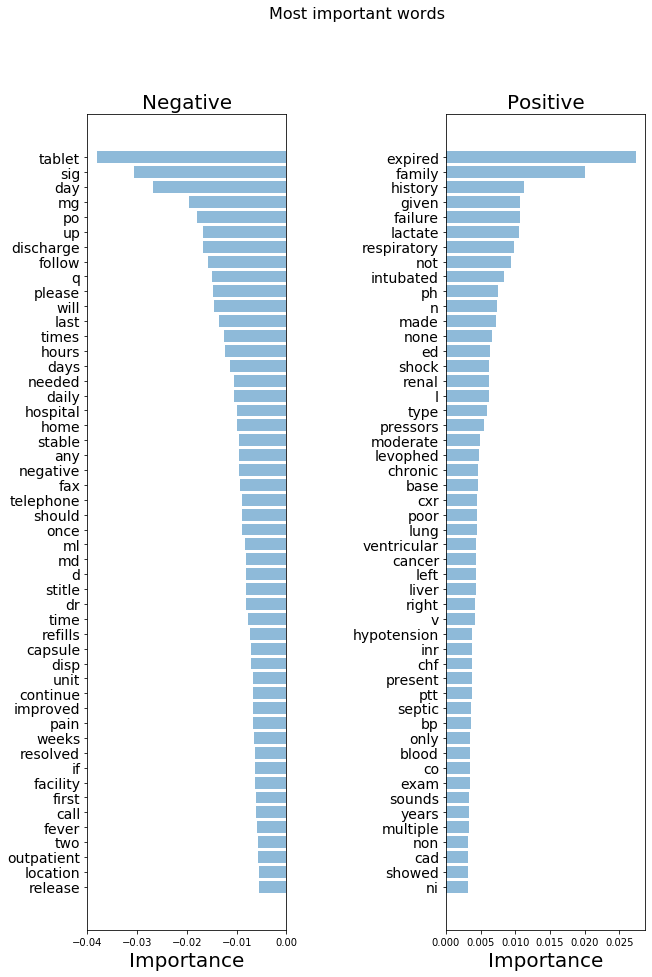

In [30]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 15))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

    
importance = get_most_important_features(vect, clf, 50)
    
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words")

In [20]:
#Random forests
param_grid = {"n_estimators": [200,400,600,800],'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']}

forest = RandomForestClassifier( random_state=42)
rand_for_text = GridSearchCV(forest, param_grid, scoring = 'roc_auc',cv=5)
rand_for_text.fit(X_notes_tf,y_vitals)
print(rand_for_text.best_score_)
print(rand_for_text.best_params_)
print(rand_for_text.best_estimator_)

/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/s

0.9883859195576463
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 400}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [21]:
#SVM
sv_clf = SVC(random_state=42)

param_grid = {'C': [ 0.0001, 0.001, 0.01, 1, 100, 1000, 2000, 2500, 3000], 
              'gamma': [ 0.01, 0.001, 0.002, 0.003, 0.004, 0.005, 0.0001], 
              'kernel': ['rbf']
              }
grid_sv_text = GridSearchCV(sv_clf, param_grid, cv=5, scoring="roc_auc")
grid_sv_text.fit(X_notes_tf,y_vitals)
print(grid_sv_text.best_score_)
print(grid_sv_text.best_params_)
print(grid_sv_text.best_estimator_)

/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A colu

0.9783103037918028
{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [22]:
#logistic
#Logistic regression
logreg=LogisticRegression()
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(-3, 3, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
clf_logit_text = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0,scoring="roc_auc")
clf_logit_text.fit(X_notes_tf,y_vitals)
print(clf_logit_text.best_score_)
print(clf_logit_text.best_params_)
print(clf_logit_text.best_estimator_)

/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A colu

0.9840160295710579
{'C': 0.1, 'penalty': 'l1'}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
#decisiontrees
#Decision trees
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_dt_text = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,scoring="roc_auc")
clf_dt_text.fit(X_notes_tf,y_vitals)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)},
             p

In [24]:
print(clf_dt_text.best_score_)
print(clf_dt_text.best_params_)
print(clf_dt_text.best_estimator_)

0.9685177988925617
{'max_depth': 7, 'min_samples_split': 190}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=190,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [25]:
#Naive Bayes
clf_gnb_text=GaussianNB().fit(X_notes_tf.toarray(),y_vitals)
np.mean(cross_val_score(clf_gnb_text,X_notes_tf.toarray(),y_vitals,scoring="roc_auc",cv=5))

/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A colu

0.9025928150801462

In [26]:
#Adaboost
clf_ada_text=AdaBoostClassifier().fit(X_notes_tf,y_vitals)
np.mean(cross_val_score(clf_ada_text,X_notes_tf,y_vitals,scoring="roc_auc",cv=5))

/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A colu

0.9842149861151981

In [27]:
#gradient boost
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025,  0.075, 0.1, 0.15],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf_gb_text = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,scoring="roc_auc")

clf_gb_text.fit(X_notes_tf,y_vitals)
print(clf_gb_text.best_params_)
print(clf_gb_text.best_score_)

/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/shayantan/miniconda3/envs/DAAL4PY/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'criterion': 'friedman_mse', 'learning_rate': 0.15, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 10, 'subsample': 1.0}
0.9828071903842776


In [28]:
X_notes_tf

<1184x500 sparse matrix of type '<class 'numpy.int64'>'
	with 293656 stored elements in Compressed Sparse Row format>

In [29]:
from scipy import sparse

sparse.save_npz("text.npz", X_notes_tf)
